Se va a Realizar cuantización  de una imagen  reduciendo el número de colores requeridos, preservando la calidad de la imagen.

Los pixels seran represnetados en un espacio 3D y Kmeans se usara para encontrar 64 clusters que seran los colores con más importancia que se usaran en la imagen resultados


In [1]:
from time import time

import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import load_sample_image
from sklearn.metrics import pairwise_distances_argmin
from sklearn.utils import shuffle

Fitting model on a small sub-sample of the data
done in 0.119s.
Predicting color indices on the full image (k-means)
done in 0.007s.
Predicting color indices on the full image (random)
done in 0.008s.


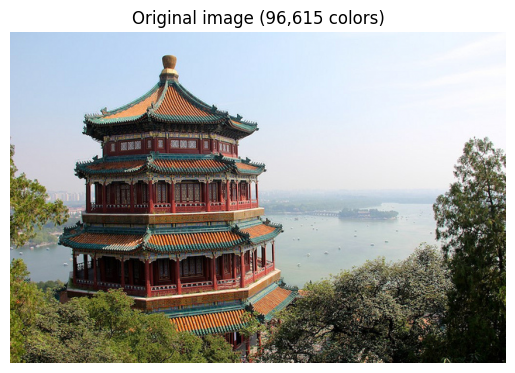

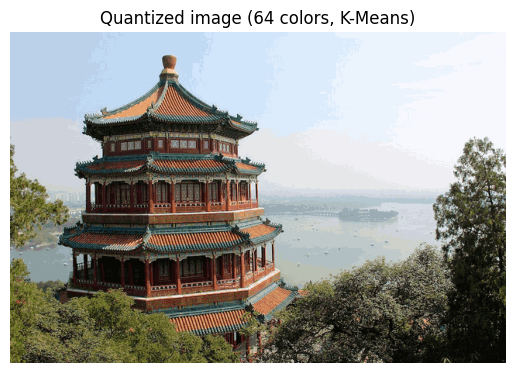

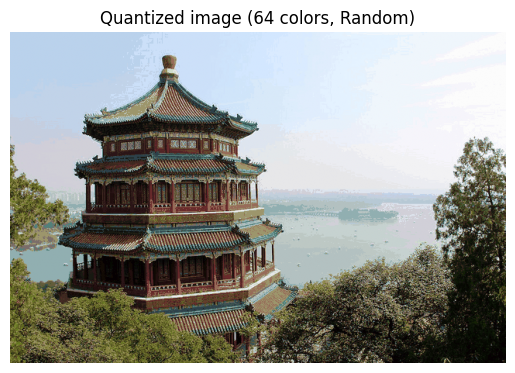

In [4]:
n_colors = 64
#Cargar la foto de China
china = load_sample_image("china.jpg")
#Convertir a flotantes los pixeles para que sriva mejor plt
#Se divide entre 255 para normalizar los datos 
china = np.array(china, dtype=np.float64) / 255
#china.shape devuelve tupla representando dimensiones de un arreglo
#h = altura
#w = ancho
#d = No. de canales de color
#tuple(china.shape) asegura que se convierta en una tupla
#w, h, d = original_shape : desempaqueta dimmensiones de la tupla en las tres variables
w, h, d = original_shape = tuple(china.shape)
#se asegura que sea una imagen RGB a color
assert d == 3
image_array = np.reshape(china, (w * h, d))
#Se agarran 1000 muestras del arreglo original (midiendo en cuanto tiempo hace esto)
#Se entrna con k-means con el numero de colores siendo los clusters deseados
#random_state = 0 se asefura que el resultado se reproducible
#.fit entrena al sampleo de muestras
print("Fitting model on a small sub-sample of the data")
t0 = time()
image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
print(f"done in {time() - t0:0.3f}s.")

# Get labels for all points
print("Predicting color indices on the full image (k-means)")
t0 = time()
labels = kmeans.predict(image_array)
print(f"done in {time() - t0:0.3f}s.")

#Selecciona un conjunto de colores
#Calcula el indice del color en codebook_random que es mas cercano para cada pixel en la imagen
codebook_random = shuffle(image_array, random_state=0, n_samples=n_colors)
print("Predicting color indices on the full image (random)")
t0 = time()
labels_random = pairwise_distances_argmin(codebook_random, image_array, axis=0)
print(f"done in {time() - t0:0.3f}s.")


def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    return codebook[labels].reshape(w, h, -1)


# Display all results, alongside original image
plt.figure(1)
plt.clf()
plt.axis("off")
plt.title("Original image (96,615 colors)")
plt.imshow(china)

plt.figure(2)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, K-Means)")
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

plt.figure(3)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, Random)")
plt.imshow(recreate_image(codebook_random, labels_random, w, h))
plt.show()

Disminuyendo el número de colores 10

Fitting model on a small sub-sample of the data
done in 0.011s.
Predicting color indices on the full image (k-means)
done in 0.005s.
Predicting color indices on the full image (random)
done in 0.005s.


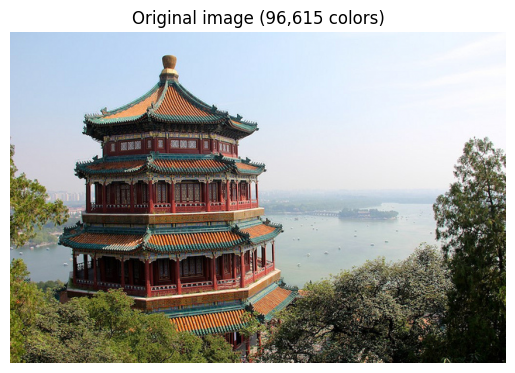

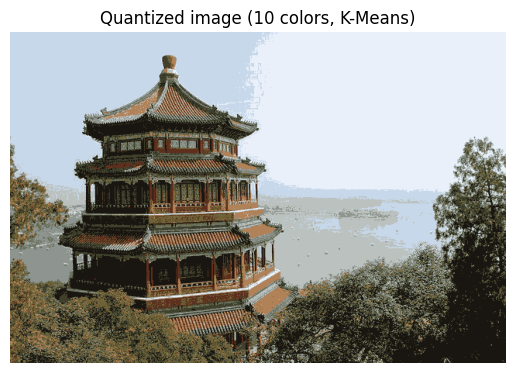

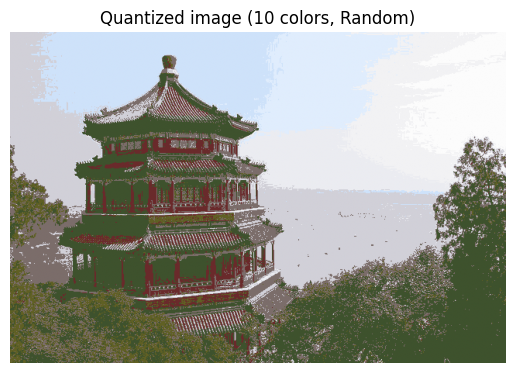

In [12]:
n_colors = 10
#Cargar la foto de China
china = load_sample_image("china.jpg")
#Convertir a flotantes los pixeles para que sriva mejor plt
#Se divide entre 255 para normalizar los datos 
china = np.array(china, dtype=np.float64) / 255
#china.shape devuelve tupla representando dimensiones de un arreglo
#h = altura
#w = ancho
#d = No. de canales de color
#tuple(china.shape) asegura que se convierta en una tupla
#w, h, d = original_shape : desempaqueta dimmensiones de la tupla en las tres variables
w, h, d = original_shape = tuple(china.shape)
#se asegura que sea una imagen RGB a color
assert d == 3
image_array = np.reshape(china, (w * h, d))
#Se agarran 1000 muestras del arreglo original (midiendo en cuanto tiempo hace esto)
#Se entrna con k-means con el numero de colores siendo los clusters deseados
#random_state = 0 se asefura que el resultado se reproducible
#.fit entrena al sampleo de muestras
print("Fitting model on a small sub-sample of the data")
t0 = time()
image_array_sample = shuffle(image_array, random_state=0, n_samples=1000)
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
print(f"done in {time() - t0:0.3f}s.")

# Get labels for all points
print("Predicting color indices on the full image (k-means)")
t0 = time()
labels = kmeans.predict(image_array)
print(f"done in {time() - t0:0.3f}s.")

#Selecciona un conjunto de colores
#Calcula el indice del color en codebook_random que es mas cercano para cada pixel en la imagen
codebook_random = shuffle(image_array, random_state=0, n_samples=n_colors)
print("Predicting color indices on the full image (random)")
t0 = time()
labels_random = pairwise_distances_argmin(codebook_random, image_array, axis=0)
print(f"done in {time() - t0:0.3f}s.")


def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    return codebook[labels].reshape(w, h, -1)


# Display all results, alongside original image
plt.figure(1)
plt.clf()
plt.axis("off")
plt.title("Original image (96,615 colors)")
plt.imshow(china)

plt.figure(2)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, K-Means)")
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

plt.figure(3)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, Random)")
plt.imshow(recreate_image(codebook_random, labels_random, w, h))
plt.show()

Prueba sin usar un numero cauntificado de pruebas

Fitting model on a small sub-sample of the data
done in 0.812s.
Predicting color indices on the full image (k-means)
done in 0.006s.


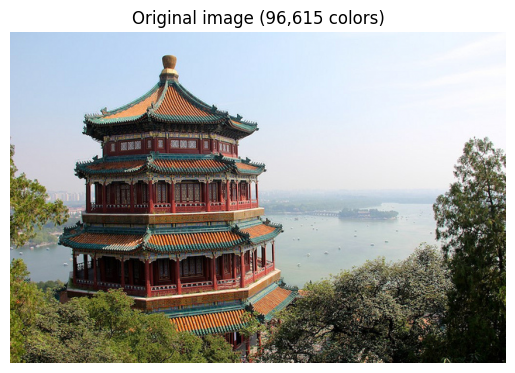

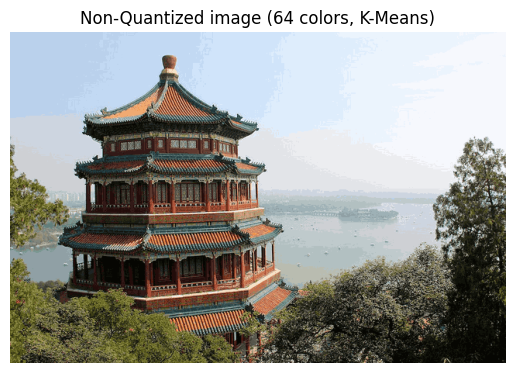

In [33]:
n_colors = 64
#Cargar la foto de China
china = load_sample_image("china.jpg")
#Convertir a flotantes los pixeles para que sriva mejor plt
#Se divide entre 255 para normalizar los datos 
china = np.array(china, dtype=np.float64) / 255
#china.shape devuelve tupla representando dimensiones de un arreglo
#h = altura
#w = ancho
#d = No. de canales de color
#tuple(china.shape) asegura que se convierta en una tupla
#w, h, d = original_shape : desempaqueta dimmensiones de la tupla en las tres variables
w, h, d = original_shape = tuple(china.shape)
#se asegura que sea una imagen RGB a color
assert d == 3
image_array = np.reshape(china, (w * h, d))
#Se agarran 1000 muestras del arreglo original (midiendo en cuanto tiempo hace esto)
#Se entrna con k-means con el numero de colores siendo los clusters deseados
#random_state = 0 se asefura que el resultado se reproducible
#.fit entrena al sampleo de muestras
print("Fitting model on a small sub-sample of the data")
t0 = time()
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array)
print(f"done in {time() - t0:0.3f}s.")

# Get labels for all points
print("Predicting color indices on the full image (k-means)")
t0 = time()
labels = kmeans.predict(image_array)
print(f"done in {time() - t0:0.3f}s.")



# Display all results, alongside original image
plt.figure(1)
plt.clf()
plt.axis("off")
plt.title("Original image (96,615 colors)")
plt.imshow(china)

plt.figure(2)
plt.clf()
plt.axis("off")
plt.title(f"Non-Quantized image ({n_colors} colors, K-Means)")
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))


cambiando el numero del espacio de prueba utilizado para entrenar el modelo

Fitting model on a small sub-sample of the data
done in 0.019s.
Predicting color indices on the full image (k-means)
done in 0.002s.


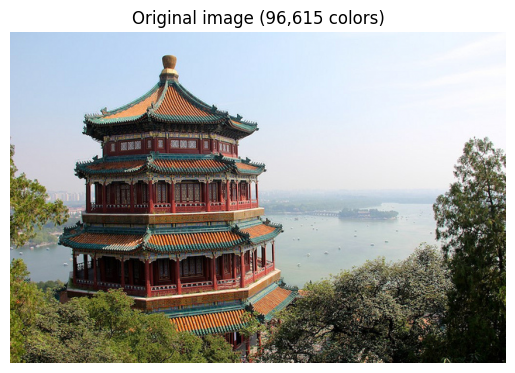

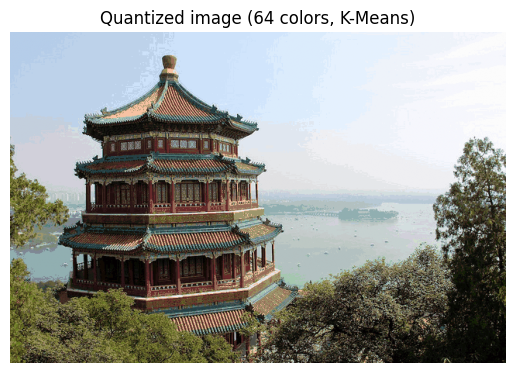

In [31]:
n_colors = 64
#Cargar la foto de China
china = load_sample_image("china.jpg")
#Convertir a flotantes los pixeles para que sriva mejor plt
#Se divide entre 255 para normalizar los datos 
china = np.array(china, dtype=np.float64) / 255
#china.shape devuelve tupla representando dimensiones de un arreglo
#h = altura
#w = ancho
#d = No. de canales de color
#tuple(china.shape) asegura que se convierta en una tupla
#w, h, d = original_shape : desempaqueta dimmensiones de la tupla en las tres variables
w, h, d = original_shape = tuple(china.shape)
#se asegura que sea una imagen RGB a color
assert d == 3
image_array = np.reshape(china, (w * h, d))
#Se agarran 1000 muestras del arreglo original (midiendo en cuanto tiempo hace esto)
#Se entrna con k-means con el numero de colores siendo los clusters deseados
#random_state = 0 se asefura que el resultado se reproducible
#.fit entrena al sampleo de muestras
print("Fitting model on a small sub-sample of the data")
t0 = time()
image_array_sample = shuffle(image_array, random_state=0, n_samples=100)
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
print(f"done in {time() - t0:0.3f}s.")

# Get labels for all points
#Predice los colores
print("Predicting color indices on the full image (k-means)")
t0 = time()
labels = kmeans.predict(image_array)
print(f"done in {time() - t0:0.3f}s.")


# Display all results, alongside original image
plt.figure(1)
plt.clf()
plt.axis("off")
plt.title("Original image (96,615 colors)")
plt.imshow(china)

plt.figure(2)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, K-Means)")
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))